In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

fatal: destination path 'belt' already exists and is not an empty directory.


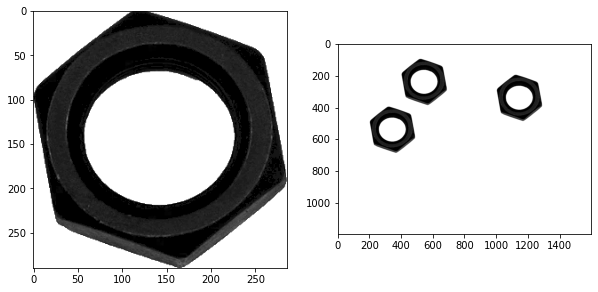

In [24]:
!git clone  https://github.com/RansikaG/EN2550---Machine-Vision belt
template_im = cv.imread(r'/content/belt/Assignment 5/template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'/content/belt/Assignment 5/belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()